<a href="https://colab.research.google.com/github/kavyagayathri/Data-Science/blob/main/linear%2Clogistic%2Csvm_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv')

In [4]:
df.shape

(500, 9)

In [3]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
df.drop(['Serial No.'],axis=1,inplace=True)

In [10]:
X = df.drop(['Chance of Admit '],axis=1)
y = df['Chance of Admit ']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [12]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
227,312,110,2,3.5,3.0,8.53,0
417,316,103,3,3.5,2.0,7.68,0
203,334,120,5,4.0,5.0,9.87,1
126,323,113,3,4.0,3.0,9.32,1
329,297,96,2,2.5,1.5,7.89,0


In [13]:
y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
495,0.87
496,0.96
497,0.93
498,0.73


In [14]:
X_train.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
GRE Score,1.000000,0.818875,0.654580,0.618267,0.499307,0.824408,0.580016
TOEFL Score,0.818875,1.000000,0.648601,0.640837,0.510886,0.796095,0.463586
University Rating,0.654580,0.648601,1.000000,0.719585,0.598662,0.712372,0.449164
SOP,0.618267,0.640837,0.719585,1.000000,0.654291,0.710670,0.395857
LOR,0.499307,0.510886,0.598662,0.654291,1.000000,0.625005,0.345331
CGPA,0.824408,0.796095,0.712372,0.710670,0.625005,1.000000,0.494774
Research,0.580016,0.463586,0.449164,0.395857,0.345331,0.494774,1.000000


In [15]:
df.drop(['University Rating','SOP','LOR '],axis=1,inplace=True)

In [16]:
df.head()

,GRE Score,TOEFL Score,CGPA,Research,Chance of Admit
0,337,118,9.65,1,0.92
1,324,107,8.87,1,0.76
2,316,104,8.00,1,0.72
3,322,110,8.67,1,0.80
4,314,103,8.21,0,0.65


In [17]:
plt.ioff()
plt.figure(figsize=(10,10))

<Figure size 1000x1000 with 0 Axes>

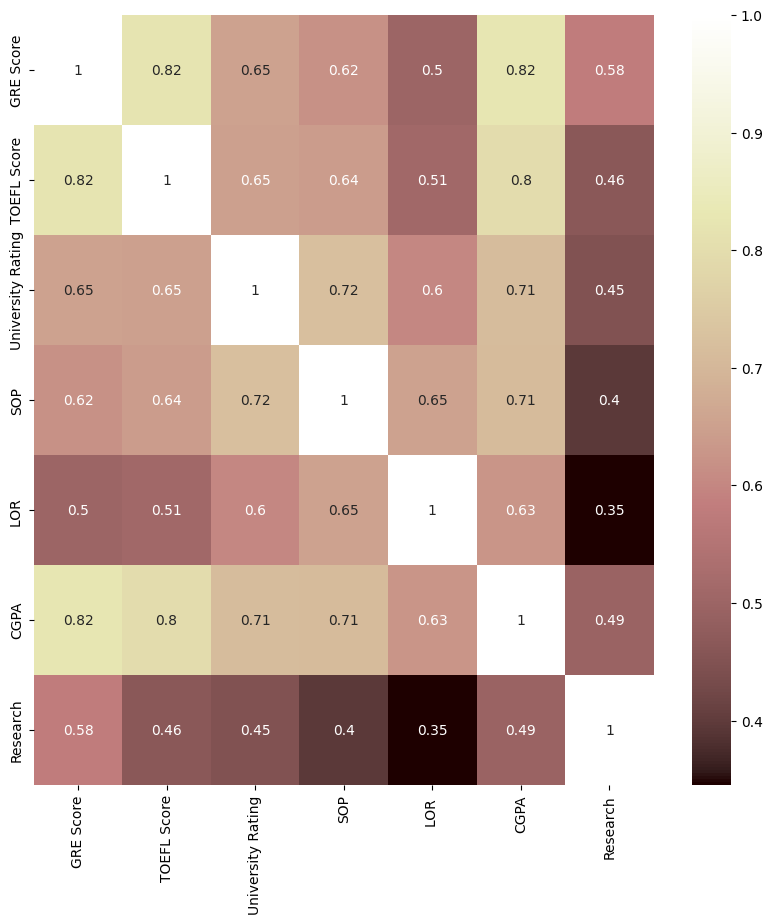

In [18]:
corr = X_train.corr()
sns.heatmap(corr,annot=True,cmap='pink')
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
X_train_scaled

array([[-0.43126246,  0.4405822 , -0.95902733, ..., -0.5154475 ,
        -0.08651715, -1.11602374],
       [-0.06681531, -0.70563017, -0.09034315, ..., -1.60136217,
        -1.50073985, -1.11602374],
       [ 1.57319686,  2.07802844,  1.64702519, ...,  1.65638185,
         2.14296333,  0.89603829],
       ...,
       [-1.34238033, -1.36060866, -1.8277115 , ..., -1.60136217,
        -2.21617016, -1.11602374],
       [-0.70459782, -0.37814092, -0.95902733, ...,  0.57046717,
        -1.50073985, -1.11602374],
       [-0.24903888, -0.21439629, -0.95902733, ...,  0.02750984,
        -0.55237875, -1.11602374]])

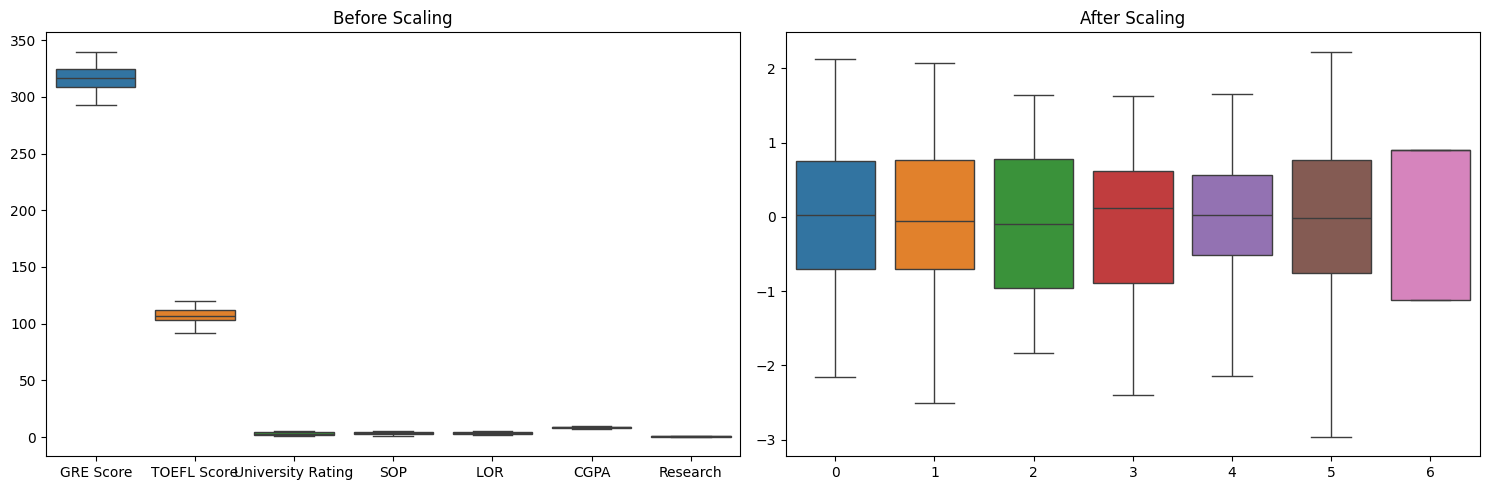

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('After Scaling')
plt.tight_layout()
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

Mean absolute error 0.04311184801806063
R2 score 0.8163213016062119


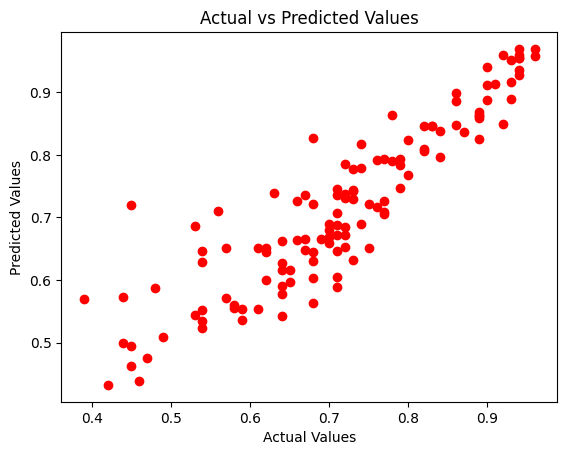

In [24]:
linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('Mean absolute error',mae)
print('R2 score',score)
plt.scatter(y_test,y_pred,color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

Mean absolute error 0.11134272
R2 score -0.003084640920782755


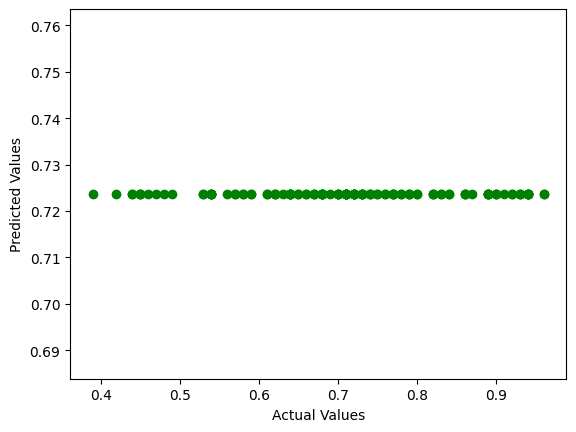

In [25]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred_lasso= lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred_lasso)
score=r2_score(y_test,y_pred_lasso)
print('Mean absolute error',mae)
print('R2 score',score)
plt.scatter(y_test,y_pred_lasso,color='green')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

Mean absolute error 0.04312667129676179
R2 score 0.8164097975719562


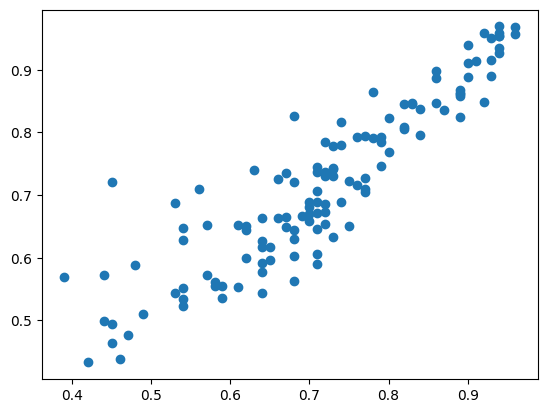

In [26]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred_ridge)
score=r2_score(y_test,y_pred_ridge)
print('Mean absolute error',mae)
print('R2 score',score)
plt.scatter(y_test,y_pred_ridge)
plt.show()

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
model= LogisticRegression()


In [29]:
df.head()

,GRE Score,TOEFL Score,CGPA,Research,Chance of Admit
0,337,118,9.65,1,0.92
1,324,107,8.87,1,0.76
2,316,104,8.00,1,0.72
3,322,110,8.67,1,0.80
4,314,103,8.21,0,0.65


In [31]:
df['Research'].value_counts()

,count
Research,
1,280
0,220


In [32]:
df['Chance of Admit '].value_counts()

,count
Chance of Admit,
0.71,23
0.64,19
0.73,18
0.72,16
0.79,16
...,...
0.60,2
0.51,2
0.43,1


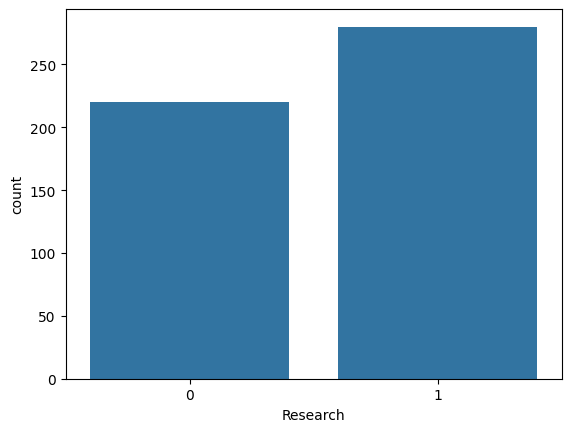

In [33]:
sns.countplot(x='Research',data=df)
plt.show()


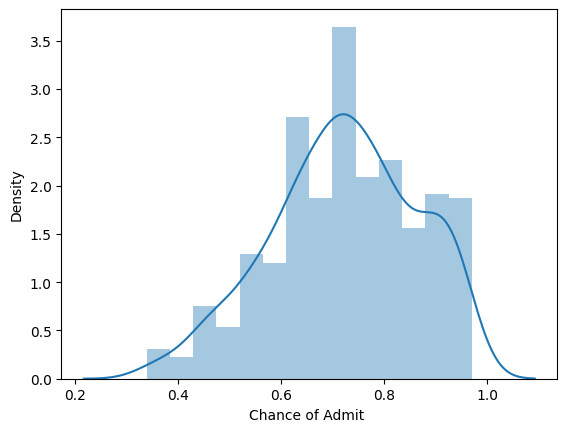

In [34]:
sns.distplot(df['Chance of Admit '])
plt.show()

In [35]:
df.head()

,GRE Score,TOEFL Score,CGPA,Research,Chance of Admit
0,337,118,9.65,1,0.92
1,324,107,8.87,1,0.76
2,316,104,8.00,1,0.72
3,322,110,8.67,1,0.80
4,314,103,8.21,0,0.65


In [39]:
X=df[['GRE Score','TOEFL Score','CGPA','Chance of Admit ']]
y=df[['Research']]

In [45]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [42]:
model.fit(x_train,y_train)

LogisticRegression()

In [46]:
print('Accuracy:', model.score(x_test, y_test))
score = cross_val_score(model, X, y, cv=5)
print('CV Score:', np.mean(score))

Accuracy: 0.736
CV Score: 0.756


In [47]:
model.score(x_test, y_test)

0.736

In [48]:
predictions = model.predict(x_test)

In [49]:
predictions

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1])

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
accuracy = confusion_matrix(y_test,predictions)

In [52]:
accuracy

array([[38, 15],
       [18, 54]])

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.736

In [55]:
from sklearn.metrics import classification_report

In [56]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70        53
           1       0.78      0.75      0.77        72

    accuracy                           0.74       125
   macro avg       0.73      0.73      0.73       125
weighted avg       0.74      0.74      0.74       125



In [57]:
from sklearn.svm import SVR
svr= SVR()
svr.fit(x_train,y_train)

SVR()

In [58]:
y_pred = svr.predict(x_test)

In [59]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [60]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

0.25611788697774085
0.34930509127672554
